# Classification vs Regression

So, over the past few lectures, we've been talking about different Machine Learning models that you can create to help you **fit to an possible underlying trend in a dataset** and **generalize well to other data points**. However, a lot of the different models we have been creating are what we call **regression models**. Today, we'll be talking about another type of modeling: **classification**.

## Recap on Regression

Just to give a brief recap on what regression models are and what they do:

- Input a set of continuous variables as features
- Output a continuous value as its prediction
- Not good with discrete variables or categorial variables
- Example: predicting height based off of people's weights.
- Regression models can range from Linear Regression models to Neural Networks (we'll be going into what those are next lecture).

As we saw from the Linear Regression lecture, regression models can be incredibly useful in terms of predicting different **continuous variables**, but not well with predicting **discrete variables**.

So, in order to create models that are good at predicting discrete variables, we must introduce a new type of modelling: classification models. These models are useful for when we want to classify some sample inputs into classes or categories. They can:
- Input lists of features or qualities of a sample and output a class or label
- Can take in discrete or categorical variables
- Can involve generating a probability for an output to be each different class, and selecting the class with the highest probability

Today, we'll be focusing a lot of different classification models, and different circumstances under which these kinds of models would be useful, as well as the different implementations for these models.

## Some Inuition on Classification

Let's take a look at the following picture:

<img src='machine_learning_classification_graph.png'>

**Question:** Let's say we introduced a new point $X$ into the picture above. What would you guess the type (or class) the point would be?

From the picture, the intuition behind predicting $X$ would be to just look at the different points nearby it! In other words, we can **predict the class of a point by looking at its closest neighbors.**

### Real World Example

One real world example of where predicting the class fo a point based off of its neighbors is with an upcoming exam. Let's say you ask two different people who already took the exam how hard it was, so you can gauge how hard it might be for yourself. But let's also say between the two people you ask, one is super duper smart and the other is Pass/No-Passing the class. Their perspectives of how difficult the test can be incredibly different from another. The super duper smart person might say the test was pretty easy, which may have been a result of their intellect and the time they put into studying for the exam. The person taking the class Pass/No Pass might think the test was incredibly hard, which may have been a result of them putting in less effort into the class due to the fact that they only need to Pass it.

So, we see that both people can have incredibly different responses (or classes) of how difficult the exam was, and both of their responses might not be useful to you, as their skill levels and the amount of preparation they put into the class may be very different from your owns. In order to accurately gauge how difficult the test might be, you want to ask people around you (in terms of skill level and amount of preparation)!

However, let's say you ask someone with around the same skill level/amount of preparation with you. That person could be a good indicator of how difficult the test might be for you, but asking that one person might not be enough. Let's say you wanted to ask more people in taking the same class what they thought of the exam. You could average out their responses, and get a general gist of how difficult the exam might be for yourself. However, if you continue to keep asking people, you might get to the point where you ask a number close to the size of the class! At that point, how difficult you think the exam might be for you is just how difficult the exam itself was on average. So, we can see that not only are **the types of people you ask** an important to factor consider, but also **the number of people** you ask can affect your result as well.

The strategy that we used to determine how difficult the exam was going to be for yourself is implemented exactly how a famous algorithm in machine learning is implemented, called **k-Nearest Neighbors** (shortened as kNN).

# KNN

# Decision Trees

Now that we've taken a good look at KNN and how useful it can be, let's take a look at a different type of modelling that also helps us classify points!

Decision trees rely on the idea of **splitting up your data points with linear decision boundaries into different sections that are able to be classified by one class.** In order words, it's asking a series of yes or no questions to make our decision/estimation on which class an input point falls under.

Here's a couple examples of what a decision trees look like:

<img src='XKCD.png' width=35%>

As we can see from the tree above, we are able to answer a yes or no question at every step, and depending on our answer, we either went one way or another through the three. They are very synonymous to flowcharts, but we'll go into more intricacies with decision trees later on. In practice, with decision tree models, they won't have cycles, but they'll have the same logic structures. Here's another example of a decision tree made by Rosa!

<img src='meme.png' width=40%>

Meme credit to $\text{Rosa Choe}^{\text{TM}}$

Now that we've seen a couple examples of decision trees, we can see how they can be used to help us classify a given input data point with a series of question to determine which class the data point lies within.

**Question:** How might you go about making the different components of a decision tree?

The intuition behind making a good decision tree is optimizing our questions (or different steps in the decision tree) to be able to split up the data into as many different, pure classes as much as possible. Now the question that can arise is, what is a good method through which we can determine these different bounds to split upon? To answer that question, we introduce the idea of entropy, where we minimize the entropy, or randomness in each split section of the data.

## Entropy

To begin, let's first define what entropy is. In the context of machine learning, entropy is **the measure of disorder within different data sets.** But how can we go about measuring the disorder within each data set? With the following:

Mathematical equation for Entropy:

$$H(\textbf{p}) = -\sum_i p_i * log_{2}(p_i)$$

where $H(\textbf{p})$ is equal to the total entropy of the data set, and $p_i$ is equal to the probability of something occurring.

Now what does this mean in the context of decision trees? Well, let's take a look at a random scatter of different points that are classified blue and orange.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng0 = np.random.RandomState(0)
rng1 = np.random.RandomState(1)
x1 = rng0.randn(50)
y1 = rng0.randn(50)
x2 = rng1.randn(100)
y2 = rng1.randn(100) - 3
plt.scatter(x1, y1);
plt.scatter(x2, y2);

From above, we can see that a good decision boundary to split our data might be at the line `y = -1`. But in order to back our visual findings with numerical proof, let's calculate the entropy of the set of data we have (which is basically just the entire data set as of now), and the entropy of each split data set weighted by the proportion of data points in each section. Now that might seem like a lot, but we'll break it down into different steps.

To begin, we've provided the following helper function to calculate entropy given a list of probabilities!

In [2]:
def entropy(probabilities):
    """
    Takes in probabilities as an array or list, and calculates the 
    Shannon's entropy of the set of data (defined above)
    """
    total = 0
    for prob in probabilities:
        total += prob * np.log2(prob)
    return -total

So, let's take a look at the entropy calculated from entire dataset itself.

In [3]:
entropy([100/150, 50/150]) # 2/3 of the points are orange, 1/3 of the points are blue

0.9182958340544896

We can see that it's about $0.92$! But what does this metric mean? Well, to see its significance, let's take a look at the different entropies of the two data subsets we get after we split the data with the line `y = -1`.

Here's a plot of the data with a horizontal line drawn at `y = -1`!.

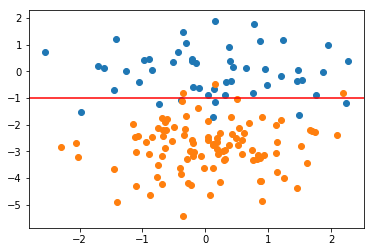

In [4]:
plt.scatter(x1, y1);
plt.scatter(x2, y2);
plt.axhline(y=-1, color='red');

Now, let's calculate the entropies of each of the two data subsets!

In [5]:
# Counting the number of orange and blue data points below the line y = 8.
orange_count_below_neg1, blue_count_below_neg1 = 0, 0
for y in y1:
    if y < -1:
        orange_count_below_neg1 += 1
for y in y2:
    if y < -1:
        blue_count_below_neg1 += 1

total_below_count = orange_count_below_neg1 + blue_count_below_neg1

# Calculating the entropy of the subset with data points with y-values less than 8.
bottom_entropy = entropy([orange_count_below_neg1 / total_below_count, blue_count_below_neg1 / total_below_count])

# Calculating the entropy of the subset with respective to its proportion size
bottom_entropy *= (total_below_count / 150) # 150 total data points
bottom_entropy

0.2466846702674598

Now, just from calculating the entropy in the subset of data points with y-values less than 1, and multiplying it by the proportion of data points in the lower subset, we see that it's already significantly lower than the entropy calculated from the entire dataset itself! However, we still need to calculate the entropy for the upper subset of data as well, and add those entropies up. Only if the summed entropies is less than the initial entropy level will we be able to conclude that this boundary we've created is useful.

DIY! Calculate the entropy of the subset of data points with y-values > -1 multiplied by the proportion of data points in that subset.

In [6]:
# Hint: Copy over what we did to calculate the bottom entropy, and change some things to get a value for the top entropy!
orange_count_above_neg1, blue_count_above_neg1 = ..., ...

top_entropy = ...

In [7]:
# TO REMOVE

# Counting the number of orange and blue data points below the line y = 8.
orange_count_above_neg1, blue_count_above_neg1 = 0, 0
for y in y1:
    if y > -1:
        orange_count_above_neg1 += 1
for y in y2:
    if y > -1:
        blue_count_above_neg1 += 1

total_above_count = orange_count_above_neg1 + blue_count_above_neg1

# Calculating the entropy of the subset with data points with y-values less than 8.
top_entropy = entropy([orange_count_above_neg1 / total_above_count, blue_count_above_neg1 / total_above_count])

# Calculating the entropy of the subset with respective to its proportion size
top_entropy *= (total_above_count / 150) # 150 total data points
top_entropy

0.10666385349512605

In [8]:
assert top_entropy == 0.10666385349512605

Now, let's calculate the total entropy of both subsets!

In [9]:
total_entropy = bottom_entropy + top_entropy
total_entropy

0.35334852376258585

Nice! From this process, we can clearly see that $0.35$ is less than $0.92$, so the decision boundary we introduced made the overall entropy of the data points lower! We've now got two subsets of the data that have lower entropy, meaning there is less disorder in terms of proportion between the two classes within each subset. We've officially made our first branch our decision tree!

A great visualization for different entropies is as follows:

<img src='Entropy.png' width='50%'>

Let's say $Pr(X = 1)$ is the probability that you flips a heads, where heads is represented by $1$ and tails is represented by $0$. From this, we can see that the y-value, $H(X)$ (or calculated entropy), is at a minimum when the chance of flipping a heads is $0$ or $1$, but is at a maximum when the chance of flipping a heads is $0.5$. In other words, the data subset is the most random when there is an equal probability of all classes, and minimized when there are probabilites of classes that are equal to $0$.

**Something to note:** When you calculate the entropy on a subset with data points that are all the same class, you run into a mathematical error, which is because $\log_{2}(0)$ cannot be calculated. So, as an alternative to calculating $\log{2}(0)$, we can bring in the following limit instead:

$$\lim _{p\to 0+}p\log(p)=0$$

Now, we're able to see from a numerical approach on which decision boundaries would be effective in terms of classifying our data, but we still haven't established how we can up with the line `y = -1`! Clearly from the above example, we derived the line `y = -1` from looking at the data, but sometimes it's not so clear to determine where decision boundaries should lie.

Question: **Is there a good strategy to determine which decision boundaries to calculate the total entropy of the subsets for?**

#### Possibly Change the Following Section

Nope! There doesn't seem to an effective way of determining which decision boundaries to test, except through iterating all the possible decision boundaries and choosing the one that results in the lowest total calculated entropy.

## Back to Decision Trees

Now that we've seen how entropy can help us determine which decision boundaries are good for our decision tree, let's get to constructing a decision tree of our own!

In [2]:
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()

Now, let's construct our own decision tree with the iris dataset by filling in the blanks below!

In [11]:
model = DecisionTreeClassifier('entropy')
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Take a look at some of the different parameters that were printed! We have things ranging from `min_samples_leaf` to `max_features`; all different parameters that can construct our desired decision tree differently. Now, like any machine learning model, let's FIT it against some training data!

In [12]:
model.fit(...) # Hint: Take a look a the documentation to see how we can fit our model against our iris.data and our iris.target

TypeError: fit() missing 1 required positional argument: 'y'

Nice! Now that we've constructed a decision tree off of the Iris data set, let's see what it looks like!

In [8]:
from helpers import plot_tree
plot_tree('entropy', 'best', datasets.load_iris())

interactive(children=(Text(value='entropy', description='crit'), Text(value='best', description='split'), Drop…

You might be able to tell that you can play around with the drop-down boxes and select which depth of tree you'd like to see, as well as input different kinds of datasets into the third argument of the `plot_tree` function. Try plugging in different kinds of data sets into the third argument of the function and see the different decision trees that pop up as a result! (Some data sets you can try out are `datasets.load_breast_cancer()` and `datasets.load_wine()`, but feel free to try other data sets that require classification!)

One thing that we want to highlight is that these decision trees stopped making decision boundaries (or branches) when the subsets were completely pure (entropy = 0)! That means that all the data points within that subset were all of the same class, and that we were able to classify every data point perfectly. Now, we can begin to classify future data points!

Question: **Is there anything wrong with creating our decision tree until all leaves are pure?**

One thing we might notice with this strategy of splitting data points until they reach "pure" data subsets is that the decision trees will be liable to **overfitting**! Let's take a look at a great example:

<img src="DecisionTreeError.png" width="100%">
Image from http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote17.html

Question: **How do we go about fixing this?**

Our solution to this problem of overfitting is limiting the number of splits your decision tree takes! By setting a certain quota for the number of splits your decision tree takes, we can ensure we don't end up with scenarios with the graph on the left, where we are too precisely creating decision boundaries.

Here's another good example!

In [ ]:
from helpers import plotPairwiseDecisionTrees

In [ ]:
# From http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# Max Depth 2
plotPairwiseDecisionTrees(2)
# Max Depth 4
plotPairwiseDecisionTrees(4)
# No Math Depth
plotPairwiseDecisionTrees()

As we can see, the deeper our tree goes, the higher the variance is within the tree, as the decision tree is super tailored towards our training data, and could be totally different had we just added/removed a couple data points. However, it also has low bias, as it won't consistently classify certain data points incorrectly (it's too precise!)

Now, we'd love to have a decision tree that had both low bias and low variance, but it seems like it's a tradeoff for one or the other. So, it'd be ideal to get the best of both worlds, and get low bias and low variance. But how?

Idea: **What if we got more models trained on our training set?**

This idea of training more models on our training set introduces the idea of **ensemble learning**, which we will go into further in the next section, and help us solve our dilemna of wanting both low bias and low variance!

## Ensemble Learning